In [0]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive') # to  113

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data_path = "/content/gdrive/My Drive/stock prediction/"
df = pd.read_csv(os.path.join(data_path, "gogl.us.txt"))
print(df.shape)


(3201, 7)


In [0]:
df.head(20)

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,141.94,143.84,141.20,143.18,89902,0
1,2005-02-28,143.70,147.19,139.47,143.14,124965,0
2,2005-03-01,141.79,142.57,131.36,134.50,229663,0
3,2005-03-02,135.27,139.11,135.06,137.56,88113,0
4,2005-03-03,138.59,138.59,132.24,134.89,120294,0
5,2005-03-04,134.00,137.00,133.34,136.47,68711,0
6,2005-03-07,136.66,137.35,134.18,135.06,81653,0
7,2005-03-08,134.36,134.78,130.41,130.54,150554,0
8,2005-03-09,130.72,132.17,127.52,129.21,131825,0
9,2005-03-10,129.21,129.21,119.22,121.95,312669,0


In [0]:
df.drop(df.index[[0,1,2,3,4,5]], inplace = True)

In [0]:
df.head(5) # Now data is in sequence of 5 days , Monday to Fridaya

,Date,Open,High,Low,Close,Volume,OpenInt
6,2005-03-07,136.66,137.35,134.18,135.06,81653,0
7,2005-03-08,134.36,134.78,130.41,130.54,150554,0
8,2005-03-09,130.72,132.17,127.52,129.21,131825,0
9,2005-03-10,129.21,129.21,119.22,121.95,312669,0
10,2005-03-11,123.92,128.57,123.92,126.67,128252,0


In [0]:
df.drop(["Date", "OpenInt"], axis = 1, inplace = True)
df.head()

,Open,High,Low,Close,Volume
6,136.66,137.35,134.18,135.06,81653
7,134.36,134.78,130.41,130.54,150554
8,130.72,132.17,127.52,129.21,131825
9,129.21,129.21,119.22,121.95,312669
10,123.92,128.57,123.92,126.67,128252


In [0]:
x_columns = ['Open', 'High', 'Low', 'Volume']
y_columns = ['Close']
x_data_original = df[x_columns]
y_data_original = df[y_columns]

In [0]:
x_data_original.head()

,Open,High,Low,Volume
6,136.66,137.35,134.18,81653
7,134.36,134.78,130.41,150554
8,130.72,132.17,127.52,131825
9,129.21,129.21,119.22,312669
10,123.92,128.57,123.92,128252


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data_original)
# y_data = scaler.fit_transform(y_data_original)
y_data = y_data_original.values
print(x_data[0:5])

[[0.82169354 0.8168843  0.81895104 0.03513489]
 [0.8075909  0.80127543 0.79549555 0.06762313]
 [0.78527194 0.78542363 0.77751509 0.05879202]
 [0.77601324 0.7674461  0.72587569 0.1440637 ]
 [0.74357717 0.76355906 0.75511728 0.05710728]]


***Neural Network***

In [0]:
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from datetime import datetime
from keras import regularizers

Using TensorFlow backend.


In [0]:
from keras.layers.recurrent import LSTM, RNN
import sys

## **LSTM**

In [0]:
def to_sequences(seq_size, data):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        #print(i)
        window = data.iloc[i:(i+seq_size),:].values
        after_window = data.iloc[i+seq_size,-1]
        window = [x for x in window]
        #print("{} - {}".format(window,after_window))
#         x.append(scaler.fit_transform(window))
        x.append(window)
        y.append(after_window)
    print(np.array(x).shape)
    return np.array(x),np.array(y)

In [0]:
lstm_df = pd.DataFrame(np.hstack([x_data,y_data])) # combining normalized data and the target ("Close" price).

In [0]:
seq = 5
xt, yt = to_sequences(seq, lstm_df)

(3189, 5, 5)


In [0]:
# train = lstm_df[:int(len(lstm_df)*0.7)]
# # test = lstm_df[int(len(lstm_df)*0.7):]

In [0]:
# train.head(10)

In [0]:
x_train, x_test , y_train, y_test  = train_test_split(xt,yt, test_size = 0.2)

In [0]:
x_train[0]

array([[4.81298669e-01, 4.87701184e-01, 4.80433024e-01, 2.96996697e-02,
        8.24450000e+01],
       [5.40131216e-01, 5.33798968e-01, 4.86530206e-01, 2.26282748e-02,
        8.28350000e+01],
       [5.01042369e-01, 4.95080474e-01, 4.88832203e-01, 1.34779456e-02,
        8.18000000e+01],
       [4.91047888e-01, 4.90920134e-01, 4.96453680e-01, 1.91597691e-02,
        8.29800000e+01],
       [4.97271445e-01, 5.20680231e-01, 5.05195048e-01, 2.55908389e-02,
        8.84750000e+01]])

In [0]:
y_train[0]

94.475

In [0]:
model = Sequential()
model.add(LSTM(128, dropout=0.0, recurrent_dropout=0.0, input_shape=(seq, 5), activation = "relu")) 
# model.add(Dropout(0.2))
model.add(Dense(32, activation ="relu"))
# model.add(Dropout(0.3))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=20, mode='auto')
# t1= datetime.now()
for i in range(3):
  history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1, epochs=200)
# train_time = datetime.now() - t1

Train on 2551 samples, validate on 638 samples
Epoch 1/200
2551/2551 [==============================] - 7s 3ms/step - loss: 1146.4312 - val_loss: 8.8366
Epoch 2/200
2551/2551 [==============================] - 1s 396us/step - loss: 10.0559 - val_loss: 8.1391
Epoch 3/200
2551/2551 [==============================] - 1s 403us/step - loss: 9.6414 - val_loss: 7.4525
Epoch 4/200
2551/2551 [==============================] - 1s 408us/step - loss: 8.7495 - val_loss: 6.2230
Epoch 5/200
2551/2551 [==============================] - 1s 403us/step - loss: 7.9139 - val_loss: 6.0311
Epoch 6/200
2551/2551 [==============================] - 1s 419us/step - loss: 7.5904 - val_loss: 5.4029
Epoch 7/200
2551/2551 [==============================] - 1s 415us/step - loss: 6.4046 - val_loss: 6.0199
Epoch 8/200
2551/2551 [==============================] - 1s 386us/step - loss: 6.0870 - val_loss: 4.8542
Epoch 9/200
2551/2551 [==============================] - 1s 375us/step - loss: 6.0265 - val_loss: 3.7999
Epoch 

In [0]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 200)               164800    
_________________________________________________________________
dense_27 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 101       
Total params: 185,001
Trainable params: 185,001
Non-trainable params: 0
_________________________________________________________________


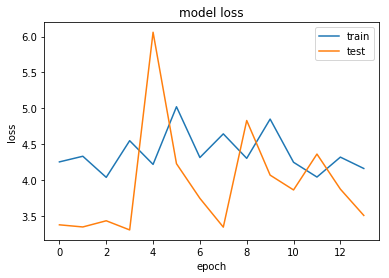

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
pred = model.predict(x_test)

In [0]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("LSTM RMSE",rmse)
# results['LSTM'] = {'RMSE': rmse, 'Training Time': train_time.total_seconds()}

LSTM RMSE 1.8725234983758066


In [0]:
# rpred = pred.reshape(pred.shape[0],)
# create_lift(outcome=y_test, model_proba=rpred, precision = 2, vis = True)

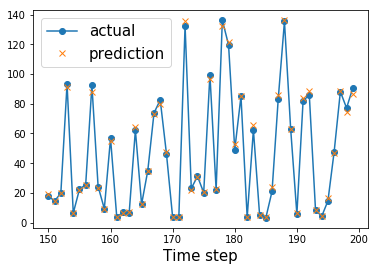

In [0]:
aa=[x for x in range(150,200)]
plt.plot(aa, y_test[150:200], marker='o', label="actual")
plt.plot(aa, pred[150:200], 'x', label="prediction")

plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()


In [0]:
def chart_regression(y,pred,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

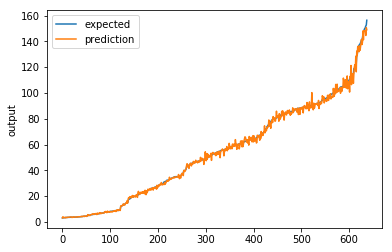

In [0]:
chart_regression(list(y_test), list(pred))

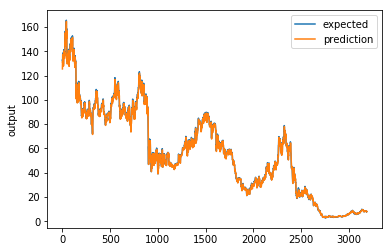

In [0]:
pred_all = model.predict(XT)
chart_regression(list(YT), list(pred_all), sort = False)